In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [39]:
df.shape

(319795, 18)

In [40]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [41]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [42]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [43]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [44]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [45]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [47]:
count_target = df['HeartDisease'].value_counts()
count_target

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Visualizing the Dataset

<Axes: xlabel='HeartDisease', ylabel='count'>

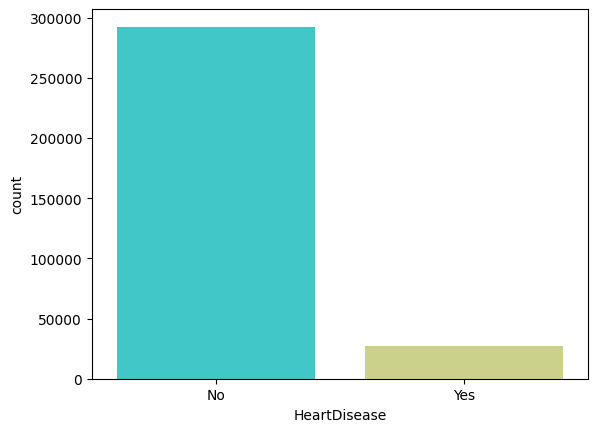

In [50]:
sns.countplot(x='HeartDisease',data=df,palette='rainbow')

<Axes: xlabel='HeartDisease', ylabel='count'>

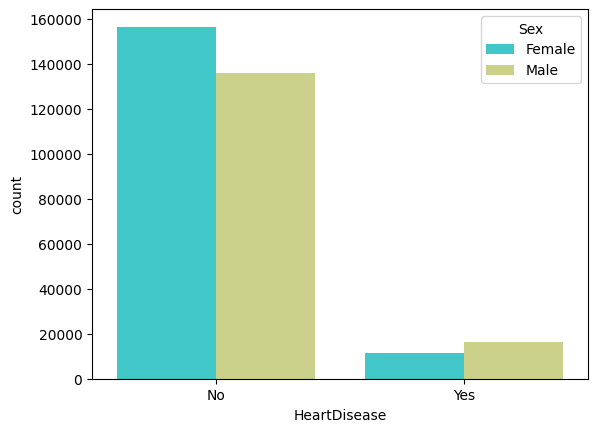

In [51]:
sns.countplot(x='HeartDisease',hue='Sex',data=df,palette='rainbow')

<Axes: xlabel='Smoking', ylabel='count'>

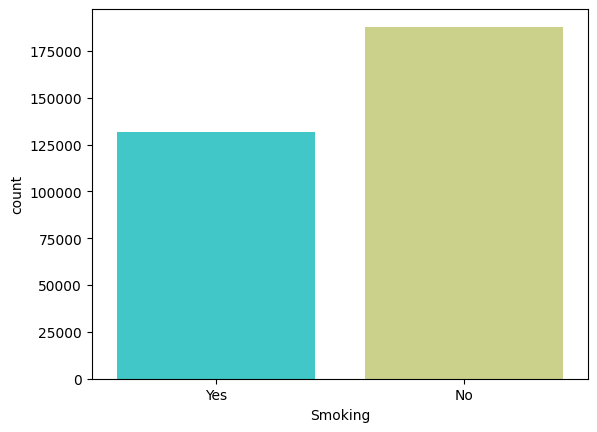

In [53]:
sns.countplot(x='Smoking', data=df, palette='rainbow')

<Axes: xlabel='AlcoholDrinking', ylabel='count'>

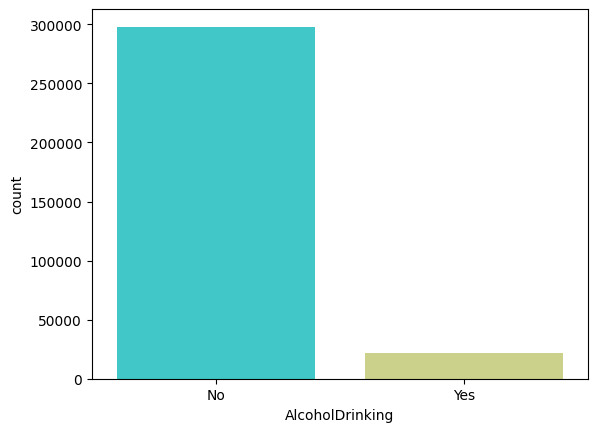

In [54]:
sns.countplot(x='AlcoholDrinking', data=df, palette='rainbow')

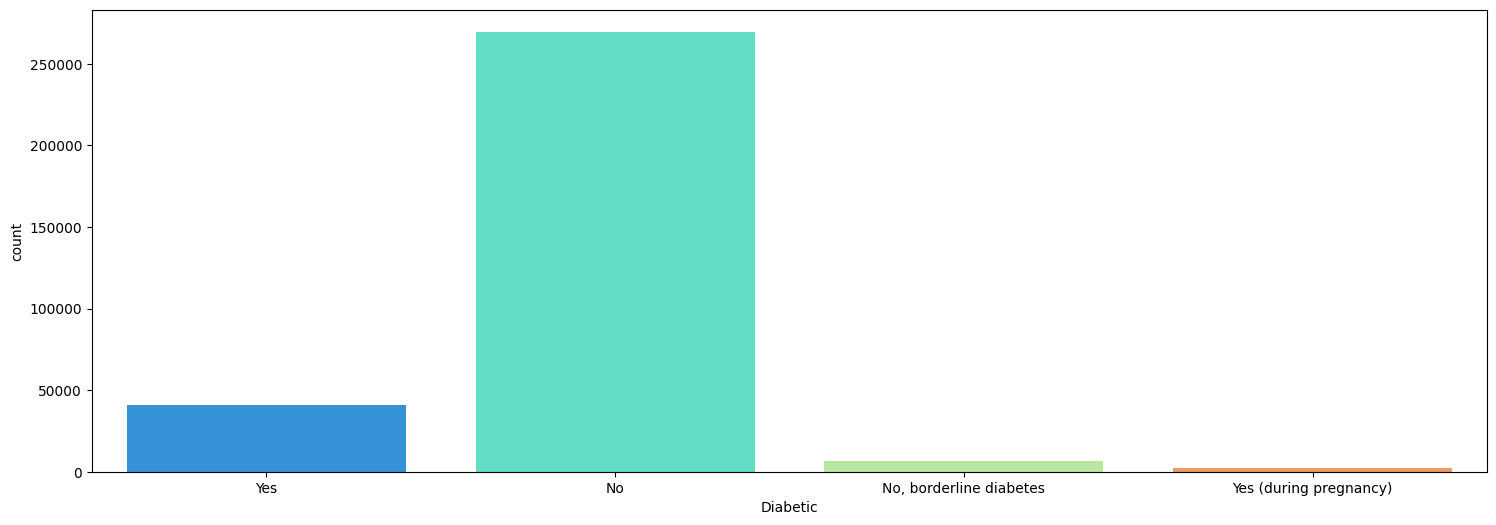

In [55]:
plt.figure(figsize=(18, 6))  
sns.countplot(x='Diabetic', data=df, palette='rainbow')

plt.show()

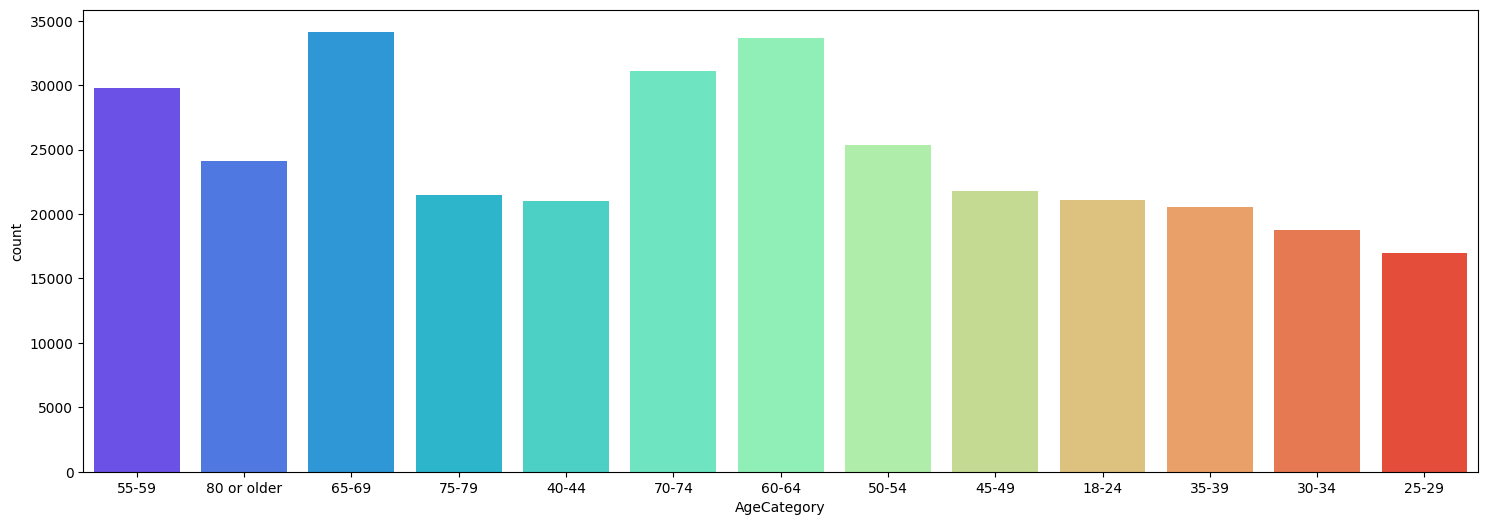

In [57]:
plt.figure(figsize=(18, 6))  
sns.countplot(x='AgeCategory', data=df, palette='rainbow')

plt.show()

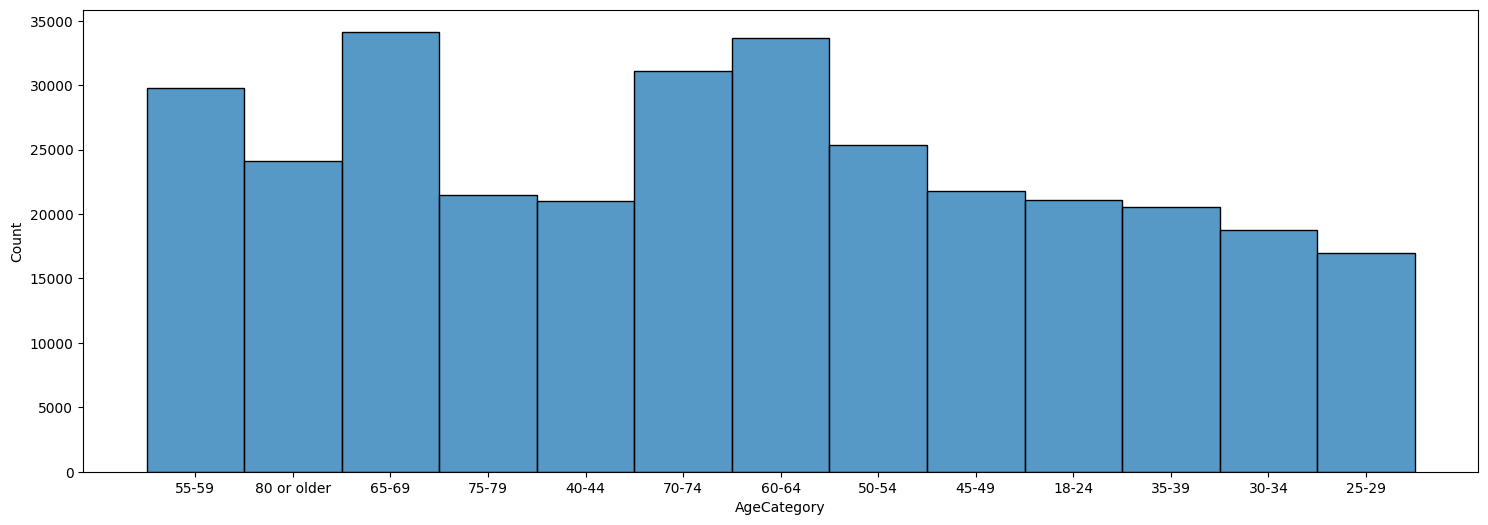

In [61]:
plt.figure(figsize=(18, 6))  


sns.histplot(df['AgeCategory'])

plt.show()

## Defining Columns Types

In [48]:
categorical_columns = df.select_dtypes(include=['object']).columns


print("Categorical Columns (Text):", categorical_columns)


Categorical Columns (Text): Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [49]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns (Numbers):", numerical_columns)


Numerical Columns (Numbers): Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


In [64]:
# Get the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create two lists to store the results
binary_columns = []
multi_value_columns = []

# Iterate through the categorical columns and check the number of unique values
for column in categorical_columns:
    unique_values = df[column].nunique()
    if unique_values == 2:
        binary_columns.append(column)
    elif unique_values > 2:
        multi_value_columns.append(column)

print("Columns with 2 unique values:", binary_columns)
print("Columns with more than 2 unique values:", multi_value_columns)


Columns with 2 unique values: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
Columns with more than 2 unique values: ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']


### Performing One Hot Encoding

In [68]:
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

print("DataFrame after converting 'Yes' to 1 and 'No' to 0:")
print(df[binary_columns].head())



DataFrame after converting 'Yes' to 1 and 'No' to 0:
   HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0             0        1                0       0            0   
1             0        0                0       1            0   
2             0        1                0       0            0   
3             0        0                0       0            0   
4             0        0                0       0            1   

   PhysicalActivity  Asthma  KidneyDisease  SkinCancer  
0                 1       1              0           1  
1                 1       0              0           0  
2                 1       1              0           0  
3                 0       0              0           1  
4                 1       0              0           0  


In [69]:
binary_columns = ['Sex']

df[binary_columns] = df[binary_columns].replace({'Female': 1, 'Male': 0})

print("DataFrame after converting 'Female' to 1 and 'Male' to 0:")
print(df[binary_columns].head())


DataFrame after converting 'Female' to 1 and 'Male' to 0:
   Sex
0    1
1    1
2    0
3    1
4    1


In [71]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0


### Performing Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder

multi_value_columns = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

label_encoder = LabelEncoder()

for column in multi_value_columns:
    df[column] = label_encoder.fit_transform(df[column])

print("DataFrame after Label Encoding:")
print(df[multi_value_columns].head())

DataFrame after Label Encoding:
   AgeCategory  Race  Diabetic  GenHealth
0            7     5         2          4
1           12     5         0          4
2            9     5         2          1
3           11     5         0          2
4            4     5         0          4


In [75]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int64
GenHealth             int32
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

### Checking for Nulls and NaNs

In [76]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [78]:
df.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
null_counts = df.isnull().sum()

print("Count of Null Values in Each Column:")
print(null_counts[null_counts > 0])  

nan_counts = df.isna().sum()

print("\nCount of NaN Values in Each Column:")
print(nan_counts[nan_counts > 0]) 

Count of Null Values in Each Column:
Series([], dtype: int64)

Count of NaN Values in Each Column:
Series([], dtype: int64)


<Axes: >

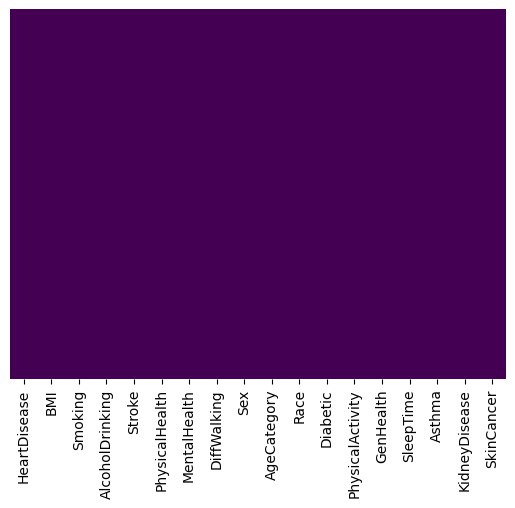

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')